In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../Position_Salaries.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../Position_Salaries.csv'

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
new_df = df.iloc[:,1:]

In [ ]:
new_df.to_csv("level_salary.csv",index=False)

In [ ]:
df = pd.read_csv("./level_salary.csv")

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


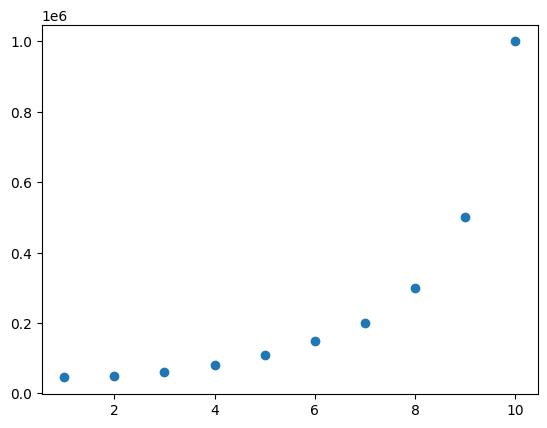

In [ ]:
plt.scatter(df_copy["Level"],df_copy["Salary"])

In [ ]:
df_copy.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [ ]:
x = df_copy[["Level"]]
y = df_copy["Salary"]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pf.transform(x)

In [ ]:
x

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
lr =LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_test,y_test)

0.9035200250665716

In [ ]:
lr.coef_

array([      0.        , -135276.80155029,   19672.61709256])

In [ ]:
prd = lr.predict(x)

In [ ]:
lr.intercept_

233244.5969913943

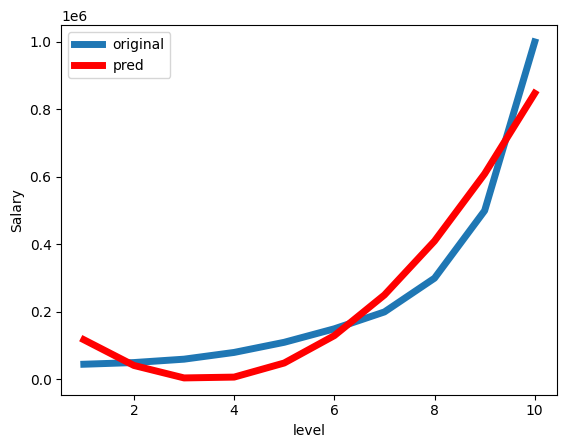

In [ ]:
plt.plot(df_copy["Level"],df_copy["Salary"],label="original",linewidth=5)
plt.plot(df_copy["Level"],prd,c="red",label="pred",linewidth=5)
plt.xlabel("level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [ ]:
test_data = pf.transform([[10]])
test_data

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  1.,  10., 100.]])

In [ ]:
lr.predict(test_data)

array([847738.29074427])